In [37]:
import psi4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import sys 

sys.path.append("..")
from helpers import *

In [38]:
psi4.set_memory('2 GB')
psi4.set_num_threads(4)

In [39]:
r = 1.5
angle1 = 120

# Water Z-Matrix for first suboptimal geometry
h2o_suboptimal1 = psi4.geometry(f"""
O1
H2 1 {r}
H3 1 {r} 2 {angle1}
""")
h2o_suboptimal_start1 = h2o_suboptimal1.clone() # we store here the starting geometry for comparison

In [40]:
# setting the options to write out the xyz files of the optimization
psi4.set_options({'reference':'uhf'})
psi4.core.set_output_file(f'h2o-opt1.log', False)

psi4.set_options({'print_trajectory_xyz_file':True})

In [41]:
# start the geometry optimization
E,hist= psi4.optimize('hf/6-31G', molecule=h2o_suboptimal1,return_history=True)
symbols = [h2o_suboptimal1.symbol(i) for i in range(h2o_suboptimal1.natom())]
bohr_to_ang = 0.52917721092
with open("geoms1.xyz", "w") as f:
    for istep, coords in enumerate(hist['coordinates']):
        coords_ang = coords * bohr_to_ang
        f.write(f"{len(symbols)}  \n")
        f.write(f"Geometry for iteration {istep} \n")
        for sym, (x,y,z) in zip(symbols, coords_ang):
            f.write(f"{sym:2s} {x:15.10f} {y:15.10f} {z:15.10f}\n")

	Change in internal coordinate of 7.03e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 6.61e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 1.00e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Energy has increased in a minimization.
	Energy ratio indicates iffy step.
	Intrafrag trust radius decreased to   0.25.
	Change in internal coordinate of 7.17e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 1.06e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Change in internal coordinate of 6.95e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 1.04e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.


Optimizer: Optimization complete!


In [42]:
drawXYZSideBySide(h2o_suboptimal_start1, h2o_suboptimal1)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [43]:
!grep -A 1 -B 4 '@DF-UHF iter' h2o-opt1.log

  ==> Iterations <==

                           Total Energy        Delta E     RMS |[F,P]|

   @DF-UHF iter SAD:   -74.85581626365709   -7.48558e+01   0.00000e+00 
   @DF-UHF iter   1:   -75.58247622847202   -7.26660e-01   6.34495e-02 DIIS/ADIIS
   @DF-UHF iter   2:   -75.61507655795599   -3.26003e-02   7.13409e-02 DIIS/ADIIS
   @DF-UHF iter   3:   -75.75369936116617   -1.38623e-01   5.80943e-03 DIIS/ADIIS
   @DF-UHF iter   4:   -75.75636179144436   -2.66243e-03   1.53890e-03 DIIS/ADIIS
   @DF-UHF iter   5:   -75.75645775053289   -9.59591e-05   1.72721e-04 DIIS/ADIIS
   @DF-UHF iter   6:   -75.75646032195334   -2.57142e-06   4.83814e-05 DIIS
   @DF-UHF iter   7:   -75.75646083458243   -5.12629e-07   2.51117e-05 DIIS
   @DF-UHF iter   8:   -75.75646100911150   -1.74529e-07   3.49754e-06 DIIS
   @DF-UHF iter   9:   -75.75646101261560   -3.50410e-09   3.22603e-07 DIIS
   @DF-UHF iter  10:   -75.75646101262805   -1.24487e-11   3.24022e-08 DIIS
   @DF-UHF iter  11:   -75.75646101262812   

In [44]:
!grep -A 10 'Convergence Check' h2o-opt1.log  

	                                 ==> Convergence Check <==                                  
    
	Measures of convergence in internal coordinates in au.
    
	Criteria marked as inactive (o), active & met (*), and active & unmet ( ).

	----------------------------------------------------------------------------------------------~
	   Step    Total Energy     Delta E     Max Force     RMS Force      Max Disp      RMS Disp   ~
	----------------------------------------------------------------------------------------------~
	  Convergence Criteria     1.00e-06 *    3.00e-04 *             o    1.20e-03 *             o~
	----------------------------------------------------------------------------------------------~
--
	                                 ==> Convergence Check <==                                  
    
	Measures of convergence in internal coordinates in au.
    
	Criteria marked as inactive (o), active & met (*), and active & unmet ( ).

	--------------------------------------

In [45]:
!grep 'Measures of convergence' h2o-opt1.log | head -n 1
!grep 'Criteria marked as inactive' h2o-opt1.log | head -n 1
!grep 'Step    Total Energy     Delta E' h2o-opt1.log | head -n 1
!grep '~' h2o-opt1.log 

	Measures of convergence in internal coordinates in au.
	Criteria marked as inactive (o), active & met (*), and active & unmet ( ).
	   Step    Total Energy     Delta E     Max Force     RMS Force      Max Disp      RMS Disp   ~
	----------------------------------------------------------------------------------------------~
	   Step    Total Energy     Delta E     Max Force     RMS Force      Max Disp      RMS Disp   ~
	----------------------------------------------------------------------------------------------~
	  Convergence Criteria     1.00e-06 *    3.00e-04 *             o    1.20e-03 *             o~
	----------------------------------------------------------------------------------------------~
	     1     -75.75646101   -7.58e+01      1.25e-01      1.06e-01 o    3.44e-01      2.89e-01 o  ~
	     2     -75.85024662   -9.38e-02      1.31e-01      1.09e-01 o    7.03e-01      5.77e-01 o  ~
	     3     -75.98480857   -1.35e-01      1.37e-02      9.79e-03 o    1.01e-01      6.77e-0

In [46]:
optimized_geos = readXYZ('geoms1.xyz')
coordinates =  read_coordinates('geoms1.xyz')

In [47]:
angle_dist = []
for coords in coordinates: # iterate over the list of coordinates, coords being a single point calculation result
    angle_dist.append(angle_distances(coords))

h2o_angles_dist = np.array(angle_dist[1:])
h2o_angles_dist

array([[ 113.26301073,    1.31815420,    1.31815420],
       [ 107.43234095,    0.94591197,    0.94591197],
       [ 113.19158490,    0.96853328,    0.96853328],
       [ 114.81408148,    0.93858201,    0.93858201],
       [ 111.74063416,    0.95051166,    0.95051166],
       [ 111.55969667,    0.94958191,    0.94958191]])

In [48]:
geo_opt_energies = !grep -a '@DF-UHF Final Energy' h2o-opt1.log
geo_opt_energies = [float(x.replace('  @DF-UHF Final Energy:   ',''))  for x in geo_opt_energies] # this is some formatting to get the values from the text file
geo_opt_energies

[-75.75646101262812,
 -75.85024662483806,
 -75.98480857161212,
 -75.98447999591548,
 -75.98489427708284,
 -75.98534064888659,
 -75.98534376014419]

In [49]:
# load in files for PES
PES_water = np.load('PES_water/water-hf-6-31G-energies.npy')
PES_r = np.load('PES_water/water-hf-6-31G-distances.npy')
PES_angle = np.load('PES_water/water-hf-6-31G-angle.npy')


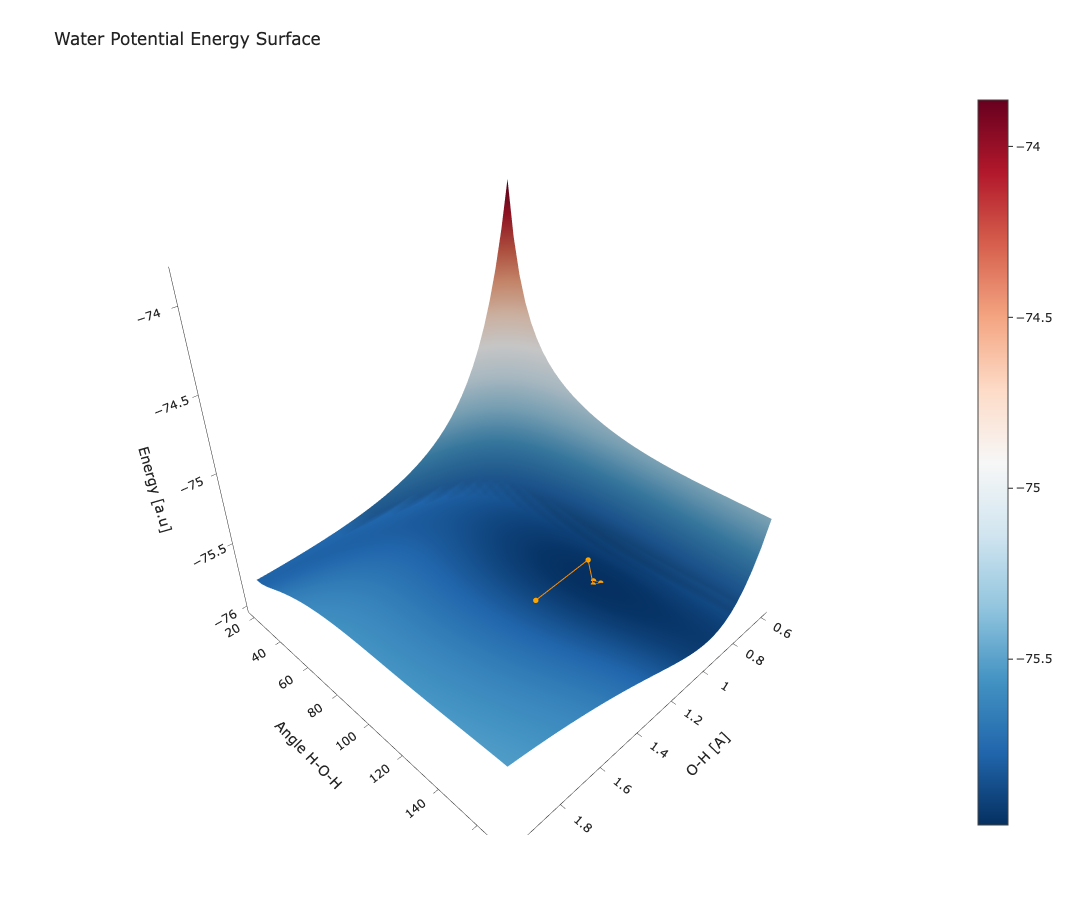

In [50]:
# this sets up the plotting widget
fig = go.Figure(data=[go.Surface(z=PES_water, 
                                 x=PES_r,
                                 y=PES_angle,
                                 colorscale='RdBu',
                                 reversescale=True,
                                 hoverinfo='none',
                                 name='Full PES',
                                 contours=go.surface.Contours(
                                    x=go.surface.contours.X(highlight=False),
                                    y=go.surface.contours.Y(highlight=False),
                                    z=go.surface.contours.Z(highlight=False),
                                )
                                )  
                     ])
# here we plot our geometry optimization results
# change the z, x, y options if you plot multiple lines, you can also change the colors
fig.add_scatter3d(z=geo_opt_energies, x=h2o_angles_dist[:,1], y=h2o_angles_dist[:,0],mode='markers+lines', marker=dict(size=3, color='orange', opacity=1),
                   line=dict(color='darkorange',width=2),
                   name="Geometry Optimization"
                 )

# this is comesmetics to add labeles etc.
fig.update_layout(title='Water Potential Energy Surface', autosize=False,
                  template='simple_white',
                  width=900, height=900,
                  scene = dict(
                      xaxis_title="O-H [A]",
                      yaxis_title="Angle H-O-H",
                      zaxis_title='Energy [a.u]',
                      xaxis_showspikes=False,
                      yaxis_showspikes=False),
                   margin=dict(l=65, r=50, b=65, t=90))
# to display the figure
fig.show()

In [51]:
drawXYZGeomSlider(optimized_geos)

interactive(children=(IntSlider(value=0, description='conf', max=5), Output()), _dom_classes=('widget-interact…

1) D'où sort le potentiel de l'eau, comment on le calcule ?
2) Comment se fait-il que pour une certaine configuration angulaire ou de distance on est sur la courbe, est ce que $E_{pot,H_2O}(r,\alpha)$ ?
3) Pourquoi 7 étapes, pourquoi on s'arrête alors que l'énergie converge à $-8.10^{-6}$ ce qui en valeur absolue ne correspond pas au treashold à $10^{-6}$
4) Est ce qu'on doit reprendre le meme potentiel dans la dernière question ?
5) Est ce que le nombre de points orange paraît être 5 mais en réalité il y a bien les 7 itérations mais les points sont simplements très proches
6) Pourquoi pour 165 degrés on sort du potentiel.
7) Pourquoi page 41 on dit : "Recall from the Born-Oppenheimer approximation that $E_{el}$ (plus or minus $V_{NN}(R)$, which we include here) will give us the potential energy experienced by the nuclei" ?